<a href="https://colab.research.google.com/github/ArbazBamboowala/DeepLearning/blob/main/DeepLearning-Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.python.framework.ops import enable_eager_execution

tf.__version__
#creating a tensor
hello = tf.constant("Hello World")


hello_2 = tf.constant("Hellow World", shape = [6,2], name="my_tensor")
print(hello_2)

#What is Tensor?
#Tensors are replacement for Numpy Array, or we can say it is an n dimensional data array
#If numpy is same as tensor, then why use tensor?
#numpy does not take advantage of GPU, same as Numpy array.
#Numpy cannot use GPU
#Add and do matrix multiplication we can use numpy but only using CPU, Tensor is Numpy array but powered by GPU

a = tf.constant([1.2])
b = tf.constant([3.4])
c = tf.add(a,b)
print(c)







tf.Tensor(
[[b'Hellow World' b'Hellow World']
 [b'Hellow World' b'Hellow World']
 [b'Hellow World' b'Hellow World']
 [b'Hellow World' b'Hellow World']
 [b'Hellow World' b'Hellow World']
 [b'Hellow World' b'Hellow World']], shape=(6, 2), dtype=string)
tf.Tensor([4.6000004], shape=(1,), dtype=float32)


True

In [ ]:
from re import DEBUG
import tensorflow as tf
from tensorflow.python.framework.ops import enable_eager_execution

tf.executing_eagerly()
#LOADING DATA
(train_x, train_y),(_,_) = tf.keras.datasets.boston_housing.load_data(test_split=0)

train_x.shape

train_y.shape

train_x.dtype #Here data is float64 i.e its in frame type and dont need gpu
#so we convert datatype to float32 or we can use float16 as well

train_x = train_x.astype('float32')

train_y = train_y.astype('float32')

train_x.shape
train_y.shape

#now I started building the model or a graph
#lets initialize weights and bias with zero
w = tf.zeros(shape=(13,1)) #these are tensors with value of 0, #shape is 13 because it has 13 features and 1 is because we do matrix multiplication, if no 1 then it will become a vector
b = tf.zeros(shape=(1)) # b is value 1 because there are total 506 data and 13 features so we multiple 506 * 13 matrix with 506 * 1 so it will become 13,1


#I just created a function for prediction
def prediction(x, w, b, y_actual):
  xw_matmul = tf.matmul(x, w)
  y = tf.add(xw_matmul, b)
  return y

#Now calculating loss i.e actual and predicted value of y, then squaring the difference and then calculating the average.
#reduce mean adds all 506 values.
#MEAN SQUARED ERROR
def loss(y_actual, y_predicted):
  diff = y_actual - y_predicted
  sqr = tf.square(diff)
  avg = tf.reduce_mean(sqr)
  return avg

#Now we do gradient and then go for descent
#GRADIENT FUNCTION
def train(x,y_actual, w, b, learning_rate = 0.01):
  #Lets record my mathematical operation on tape to calculate loss
  with tf.GradientTape() as t:
    t.watch([w,b])

    current_prediction = prediction(x,w,b,train_y)
    current_loss = loss(y_actual, current_prediction)

    #Now I will calculate Gradient for Loss w.r.t to weights and bias

  dw, db = t.gradient(current_loss,[w,b])

#Now lets do the descent

#Updating Weight and Bias
  w = w - learning_rate*dw
  b = b - learning_rate*db

  return w, b

#NOW TRAINING
#Training for 100 times:
for i in range(100):
  w, b = train(train_x, train_y, w, b, learning_rate=0.01)
  print('Current Loss on Iteration', i,
        loss(train_y, prediction(train_x, w, b,train_y)).numpy())

#Check Weights and Bias
print('Weights: \n', w.numpy())
print('Bias: \n', b.numpy())


Current Loss on Iteration 0 19006894000.0
Current Loss on Iteration 1 7.446026e+17
Current Loss on Iteration 2 2.9173265e+25
Current Loss on Iteration 3 1.1429992e+33
Current Loss on Iteration 4 inf
Current Loss on Iteration 5 inf
Current Loss on Iteration 6 inf
Current Loss on Iteration 7 inf
Current Loss on Iteration 8 inf
Current Loss on Iteration 9 inf
Current Loss on Iteration 10 nan
Current Loss on Iteration 11 nan
Current Loss on Iteration 12 nan
Current Loss on Iteration 13 nan
Current Loss on Iteration 14 nan
Current Loss on Iteration 15 nan
Current Loss on Iteration 16 nan
Current Loss on Iteration 17 nan
Current Loss on Iteration 18 nan
Current Loss on Iteration 19 nan
Current Loss on Iteration 20 nan
Current Loss on Iteration 21 nan
Current Loss on Iteration 22 nan
Current Loss on Iteration 23 nan
Current Loss on Iteration 24 nan
Current Loss on Iteration 25 nan
Current Loss on Iteration 26 nan
Current Loss on Iteration 27 nan
Current Loss on Iteration 28 nan
Current Loss o

In [ ]:
# WE SEE THAT THERE IS ALOT OF ERROR THAT IT BECAME NAN (NOT A NUMBER), so
#NOW I will use normalizer instead
import tensorflow as tf
from tensorflow.python.framework.ops import enable_eager_execution

tf.executing_eagerly()
from sklearn.preprocessing import Normalizer
(train_x, train_y),(_,_) = tf.keras.datasets.boston_housing.load_data(test_split=0)

train_x.shape

train_y.shape

train_x.dtype #Here data is float64 i.e its in frame type and dont need gpu
#so we convert datatype to float32 or we can use float16 as well

train_x = train_x.astype('float32')

train_y = train_y.astype('float32')
transformer = Normalizer()
train_x = transformer.fit_transform(train_x)
train_x[0]

w = tf.zeros(shape=(13,1))
b = tf.zeros(shape=(1))

def prediction(x, w, b, y_actual):
  xw_matmul = tf.matmul(x, w)
  y = tf.add(xw_matmul, b)
  return y
def loss(y_actual, y_predicted):
  diff = y_actual - y_predicted
  sqr = tf.square(diff)
  avg = tf.reduce_mean(sqr)
  return avg

#Now we do gradient and then go for descent
#GRADIENT FUNCTION
def train(x,y_actual, w, b, learning_rate = 0.01):
  #Lets record my mathematical operation on tape to calculate loss
  with tf.GradientTape() as t:
    t.watch([w,b])

    current_prediction = prediction(x,w,b,train_y)
    current_loss = loss(y_actual, current_prediction)

    #Now I will calculate Gradient for Loss w.r.t to weights and bias

  dw, db = t.gradient(current_loss,[w,b])

#Now lets do the descent

#Updating Weight and Bias
  w = w - learning_rate*dw
  b = b - learning_rate*db

  return w, b

#NOW TRAINING
#Training for 100 times:
#We can train further to get little more accuracy, also check values of w and b
for i in range(100):
  w, b = train(train_x, train_y, w, b, learning_rate=0.01)
  print('Current Loss on Iteration', i,
        loss(train_y, prediction(train_x, w, b,train_y)).numpy())

#Check Weights and Bias
print('Weights: \n', w.numpy())
print('Bias: \n', b.numpy())

#NOW ERROR IS REDUCED FROM NAN


Current Loss on Iteration 0 553.7515
Current Loss on Iteration 1 518.2617
Current Loss on Iteration 2 485.45786
Current Loss on Iteration 3 455.1365
Current Loss on Iteration 4 427.1098
Current Loss on Iteration 5 401.20413
Current Loss on Iteration 6 377.25897
Current Loss on Iteration 7 355.12595
Current Loss on Iteration 8 334.66788
Current Loss on Iteration 9 315.75803
Current Loss on Iteration 10 298.2792
Current Loss on Iteration 11 282.12317
Current Loss on Iteration 12 267.1898
Current Loss on Iteration 13 253.38655
Current Loss on Iteration 14 240.62788
Current Loss on Iteration 15 228.83473
Current Loss on Iteration 16 217.93405
Current Loss on Iteration 17 207.85834
Current Loss on Iteration 18 198.54506
Current Loss on Iteration 19 189.9366
Current Loss on Iteration 20 181.9796
Current Loss on Iteration 21 174.62473
Current Loss on Iteration 22 167.82646
Current Loss on Iteration 23 161.54263
Current Loss on Iteration 24 155.73434
Current Loss on Iteration 25 150.36557
Curr


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.__version__

a = tf.constant([1.2], name = 'First', dtype = tf.float32)
b = tf.constant([3.4], name = 'Second', dtype = tf.float32)
c = tf.add(a,b, name = 'Final')
print(c)


sess = tf.compat.v1.Session()
print(sess.run(hello))


In [ ]:
# USING KERAS INSTEAD OF TENSOR FLOW
import tensorflow as tf
import sklearn
from sklearn.preprocessing import Normalizer
(train_x, train_y), (_, _) = tf.keras.datasets.boston_housing.load_data(test_split=0.2)
train_x = train_x.astype('float32')

train_y = train_y.astype('float32')
transformer = Normalizer()
train_x = transformer.fit_transform(train_x)
#Now I initialized Sequential Graph using ( Model )
model = tf.keras.Sequential()

#Added Dense Layer for Prediction - KERAS DECLARES WEIGHTS AND BIAS AUTOMATICALLY
model.add(tf.keras.layers.Dense(1, input_shape = (13,)))

#NOW COMPILING THE MODEL BY ADDING LOSS AND GRADIENT DESCENT OPTIMIZER
model.compile(optimizer='sgd', loss='mse')

#Now Training the model
model.fit(train_x,train_y,epochs=100)
model.summary()
model.get_weights()

57026/57026 [==============================] - 0s 0us/step
Epoch 1/100
13/13 [==============================] - 2s 3ms/step - loss: 421.7833
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 204.6855
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 126.0101
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 96.7678
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 86.2780
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 82.2154
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 80.4696
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 79.4733
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 78.8013
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 78.2488
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 77.8335
Epoch 12/100
13/13 [=========================

[array([[-1.1832516e+00],
        [ 3.5241454e+00],
        [-5.0271535e-01],
        [-3.9203083e-03],
        [-6.1001021e-01],
        [ 1.0143864e+00],
        [-2.0639132e-01],
        [ 4.4487408e-01],
        [-3.6520404e-01],
        [-2.4805281e-01],
        [-1.9049972e-01],
        [ 1.6963312e+01],
        [-1.8796339e+00]], dtype=float32),
 array([11.41692], dtype=float32)]

In [ ]:
#LABEL HOT ENCODING USING SOFTMAX
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()
trainX.shape
trainX[0] #I can see many blank ones in this one
trainY.shape
print(testY[0:5])

#We will use Tensorflow keras and not actual keras, it is different then actual keras
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)
print(trainY.shape)
print('The first couple of examples here are: ', trainY[0:2])
#OUTPUT COMES AS 5 converted and 0 converted into 10 numbers

#BUILDING A GRAPH
#Now time for Model
#SEQUENTIAL MODEL MEANS ONLY ONE INPUT AND ONLY ONE OUTPUT
#Initializing Sequential Model
model = tf.keras.models.Sequential()

#Tried to reshape the model from 2d to 1d i.e 28x28 to 784
model.add(tf.keras.layers.Reshape((784, ), input_shape= (28,28,))) #no input shape in this because this is sequential model

#Now i worked on normalizing data where Batchnormalization is used
model.add(tf.keras.layers.BatchNormalization())

#Here I added Dense Layer which provided 10 outputs after applying softmax
#it gives 10 wx+b and also it can create output layers
#after getting 10y it applies softmax function so all numbers add upto 1
model.add(tf.keras.layers.Dense(10, activation='softmax')) #using dense layer is logistic regression

#Now i compiled the model
#categorical_crossentropy for softmax, if sigmoid then binary crossentropy
#math and formula will be different although code can run normally
#it also calculates accuracy by passsing parameter like metrics or any other like roc, confusion, etc
model.compile(optimizer='sgd',loss = 'categorical_crossentropy', metrics =['accuracy'])

#EXECUTED THE GRAPH
#LOSS NEEDS to be COMPARED BY USING Different Algorithms
model.fit(trainX,trainY, validation_data=(testX,testY),epochs=10,batch_size=32)
# to run in batches only change will be adding 32 examples that is batch size = 32, model.fit(trainX,trainY, validation_data=(testX,testY),epochs=100,batch_size=32)

model.summary()

#SAVED THE MODEL
model.save('mnist_lc.h5')
model.save('my_model.keras')

[7 2 1 0 4]
(60000, 10)
The first couple of examples here are:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4854 - accuracy: 0.8574 - val_loss: 0.3911 - val_accuracy: 0.9033
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3530 - accuracy: 0.8981 - val_loss: 0.3931 - val_accuracy: 0.9104
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3326 - accuracy: 0.9052 - val_loss: 0.4884 - val_accuracy: 0.9150
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3246 - accuracy: 0.9080 - val_loss: 0.4703 - val_accuracy: 0.9145
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3172 - accuracy: 0.9099 - val_loss: 0.4351 - val_accuracy: 0.9179
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.9108 - val_loss: 0.4212 - val_accuracy: 0.9180
Epoch

In [ ]:
#LABEL HOT ENCODING USING SOFTMAX
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()
trainX.shape
trainX[0] #I can see many blank ones in this one
trainY.shape
print(testY[0:5])

#We will use Tensorflow keras and not actual keras, it is different then actual keras
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)
print(trainY.shape)
print('The first couple of examples here are: ', trainY[0:2])
#OUTPUT COMES AS 5 converted and 0 converted into 10 numbers

#BUILDING A GRAPH
#Now time for Model
#SEQUENTIAL MODEL MEANS ONLY ONE INPUT AND ONLY ONE OUTPUT
#Initializing Sequential Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784, ), input_shape= (28,28,))) #no input shape in this because this is sequential model
model.add(tf.keras.layers.BatchNormalization())

#Adding Hidden Layers
#First Hideen Layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))
#Second Hidden Layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Third Hidden Layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))
#Fourth Hidden Layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

#Adding ouput Layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#10 because 10 neurons

#Here I added Dense Layer which provided 10 outputs after applying softmax
#it gives 10 wx+b and also it can create output layers
#after getting 10y it applies softmax function so all numbers add upto 1

#Now i compiled the model
#categorical_crossentropy for softmax, if sigmoid then binary crossentropy
#math and formula will be different although code can run normally
#it also calculates accuracy by passsing parameter like metrics or any other like roc, confusion, etc
model.compile(optimizer='sgd',loss = 'categorical_crossentropy', metrics =['accuracy'])

#EXECUTED THE GRAPH
#LOSS NEEDS to be COMPARED BY USING Different Algorithms
model.fit(trainX,trainY, validation_data=(testX,testY),epochs=30,batch_size=32)
# to run in batches only change will be adding 32 examples that is batch size = 32, model.fit(trainX,trainY, validation_data=(testX,testY),epochs=100,batch_size=32)

model.summary()

#SAVED THE MODEL
model.save('mnist_v2_lc.h5')
model.save('my_model.keras')




[7 2 1 0 4]
(60000, 10)
The first couple of examples here are:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Epoch 1/30
1875/1875 [==============================] - 11s 5ms/step - loss: 2.3009 - accuracy: 0.1152 - val_loss: 2.2966 - val_accuracy: 0.1038
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2944 - accuracy: 0.1262 - val_loss: 2.2904 - val_accuracy: 0.2029
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2861 - accuracy: 0.1432 - val_loss: 2.2777 - val_accuracy: 0.1806
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2653 - accuracy: 0.2057 - val_loss: 2.2410 - val_accuracy: 0.2964
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1729 - accuracy: 0.2809 - val_loss: 2.0444 - val_accuracy: 0.2790
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 1.9067 - accuracy: 0.3272 - val_loss: 1.7841 - val_accuracy: 0.3516
Epoc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


total 4532
-rw-r--r-- 1 root root 1544824 Dec 27 00:08 mnist_lc.h5
-rw-r--r-- 1 root root 1545096 Dec 27 00:15 mnist_v2_lc.h5
-rw-r--r-- 1 root root 1539772 Dec 27 00:15 my_model.keras
drwxr-xr-x 1 root root    4096 Dec 19 14:20 sample_data
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 200)               157000    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (

7
1/1 [==============================] - 0s 81ms/step
(5, 10)
7
7


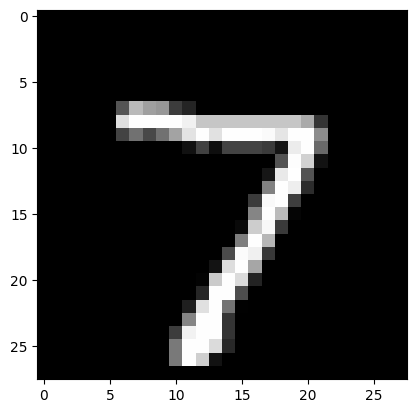

In [ ]:
import tensorflow as tf
!ls -l


model=tf.keras.models.load_model('mnist_v2_lc.h5')

model.summary()
_,(testX, testY) = tf.keras.datasets.mnist.load_data()
model.input
testX[0].shape #this is 2dimension model but we need 3d
testX[0:1].shape #now I made it to 3d

model.input #checking the type of input so it shows 3d
#ALternatively using Numpy
import numpy as np
np.expand_dims(testX[0], axis=0).shape

#actual label for first example of dataset
print(testY[0])

testX[0:1].shape
model.input

#Now I would predict the modl
prediction = model.predict(testX[0:5]) #For 5 example using 0 to 5 or

#Print Prediction
print(prediction.shape)

#Get Predicted number with highest probability
predicted_num = np.argmax(prediction[0])

#Printing the number
print(predicted_num)

testY[0]

#Lets see which output will have highest probability
predicted_num = np.argmax(prediction[0])

print(predicted_num)

#Now I will need to visualize it
import matplotlib.pyplot as plt
plt.imshow(testX[0],cmap='gray')